# Shoppers Intention Support Vector Machine Model
## Author: Aron Gu
## Date: November 9, 2024

## Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

## Problem Statement
The objective of this project is to predict online shoppers' intention(i.e. revenue)
to make a purchase based on various features related to their browsing behavior. The
dataset comprises 12,330 sessions, each belonging to a different user, over 1 year. The
features include both numerical and categorical attributes, providing insights into users'
interactions with the website.

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was
formed so that each session would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user profile, or period.

## Dataset Overview
The dataset contains 12330 rows with the following features:
1. Administrative: The number of pages of this type (administrative) visited by the user in
that session.
2. Administrative Duration: The total amount of time (in seconds) spent by the user on
administrative pages during the session.
3. Informational: The number of informational pages visited by the user in that session.
4. Informational Duration: The total time spent by the user on informational pages.
5. Product Related: The number of product-related pages visited by the user.
6. Product-Related Duration: The total time spent by the user on product-related pages.
7. Bounce Rates: The average bounce rate of the pages visited by the user. The bounce
rate is the percentage of visitors who navigate away from the site after viewing only one
page.
8. Exit Rates: The average exit rate of the pages visited by the user. The exit rate is a
metric that shows the percentage of exits from a page.
9. PageValues: The average value of the pages visited by the user. This metric is often
used as an indicator of how valuable a page is in terms of generating revenue.
10. SpecialDay: This indicates the closeness of the site visiting time to a specific special day
(e.g., Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized
with a transaction.
11. Month: The month of the year in which the session occurred.
12. Operating Systems: The operating system used by the user.
13. Browser: The browser used by the user.
14. Region: The region from which the user is accessing the website.
15. Traffic Type: The type of traffic (e.g., direct, paid search, organic search, referral).
16. Visitor Type: A categorization of users (e.g., Returning Visitor, New Visitor).
17. Weekend: A Boolean indicating whether the session occurred on a weekend.
18. Revenue: A binary variable indicating whether the session ended in a transaction
(purchase).

# EDA

## Load Shoppers Intention Dataset

In [2]:
# Read excel file
shoppers_data = pd.read_excel('online_shoppers_intention.xlsx')

In [3]:
# First 5 rows of dataset
shoppers_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Last 5 rows of dataset
shoppers_data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [5]:
# Get dimensions/shape of dataset
shoppers_data.shape

(12330, 18)

In [6]:
# Get all columns from dataset
shoppers_data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [7]:
# Retrieve datatypes for each column
shoppers_data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [8]:
# Get data info
shoppers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
# Get descriptive statistics on numerical features of dataset
shoppers_data.describe(include=['float64'])

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,80.818611,34.472398,1194.746220,0.022191,0.043073,5.889258,0.061427
std,176.779107,140.749294,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,7.500000,0.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,93.256250,0.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,3398.750000,2549.375000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [10]:
# Get descriptive statistics on categorical features of dataset
shoppers_data.describe(include=['bool', 'object'])

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


- From these statistics, you can see how VisitorType, Weekend, and Revenue(target variable) features are heavily imbalanced as these features are skewed towards a cerain majority class.

In [11]:
# Get descriptive statistics on some int64 features that are numeric from dataset

# Select specific int64 columns
specific_int64_cols = ['Administrative', 'Informational', 'ProductRelated']
shoppers_data[specific_int64_cols].describe()

,Administrative,Informational,ProductRelated
count,12330.000000,12330.000000,12330.000000
mean,2.315166,0.503569,31.731468
std,3.321784,1.270156,44.475503
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.000000
50%,1.000000,0.000000,18.000000
75%,4.000000,0.000000,38.000000
max,27.000000,24.000000,705.000000


In [12]:
# Get descriptive statistics on some int64 features that are categorical from dataset

# Select all int64 columns
all_int64_cols = shoppers_data.select_dtypes(include=['int64']).columns

# Remove the specific int64 columns already analyzed
remaining_int64_cols = [col for col in all_int64_cols if col not in specific_int64_cols]
for col in remaining_int64_cols:
    print(f"\nValue Counts for {col}:")
    print(shoppers_data[col].value_counts())


Value Counts for OperatingSystems:
OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64

Value Counts for Browser:
Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64

Value Counts for Region:
Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64

Value Counts for TrafficType:
TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64


## Identify Missing Values in Dataset

In [13]:
# Find number of missing values in each column:
shoppers_data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

- There are no missing values in the dataset, so no imputation has to be performed.

## Univariate Analysis

### Distribution Plots for Categorical Variables

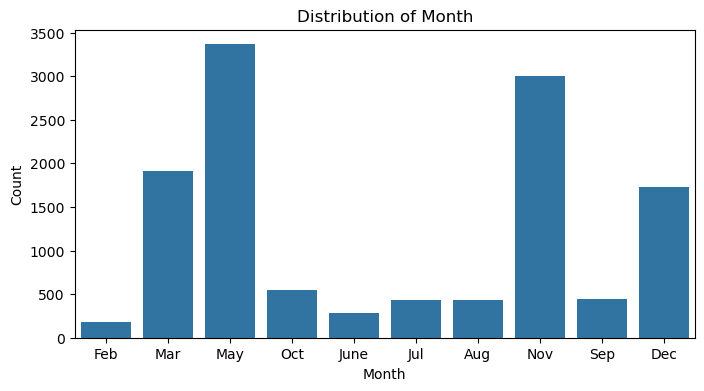

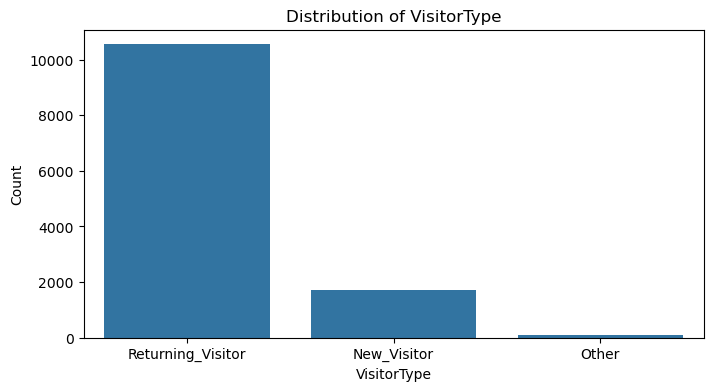

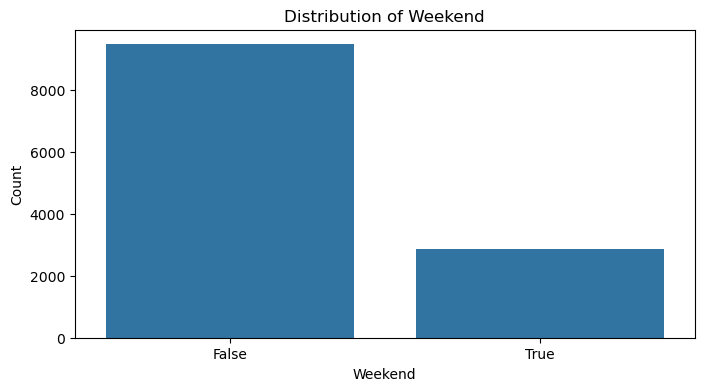

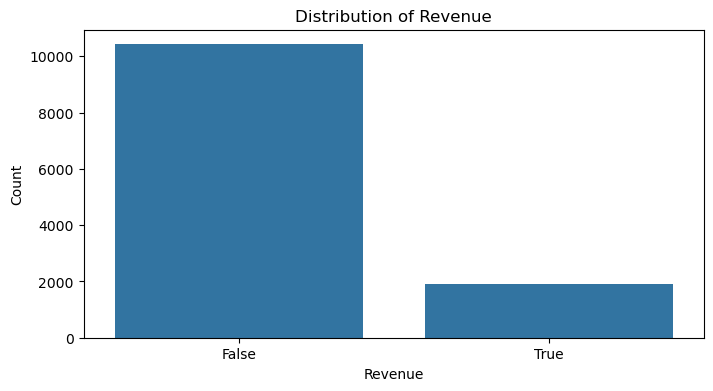

In [14]:
# Categorical features (excluding 'Revenue' as it's the target variable)
categorical_features = shoppers_data.select_dtypes(include=['object', 'bool']).columns

# Plot distributions for categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=shoppers_data)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

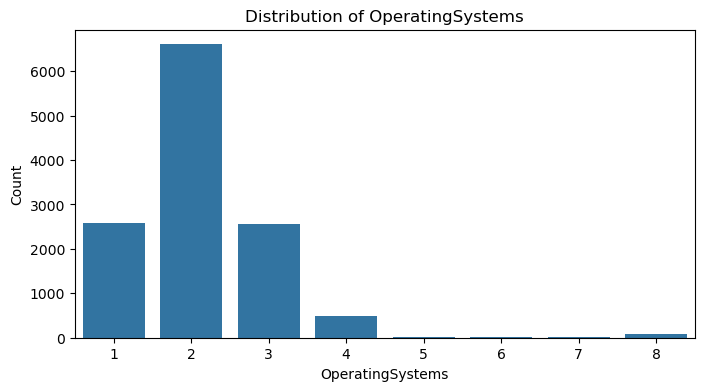

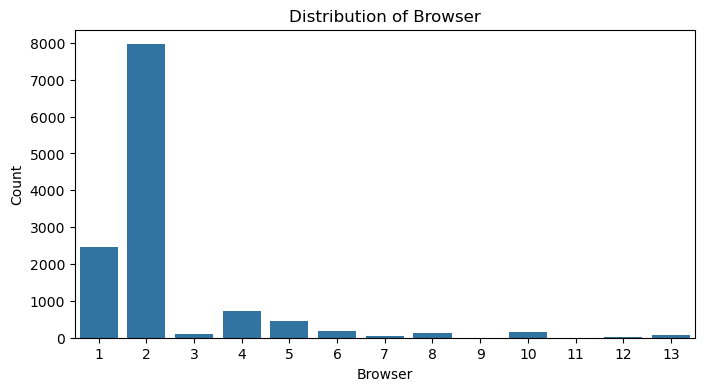

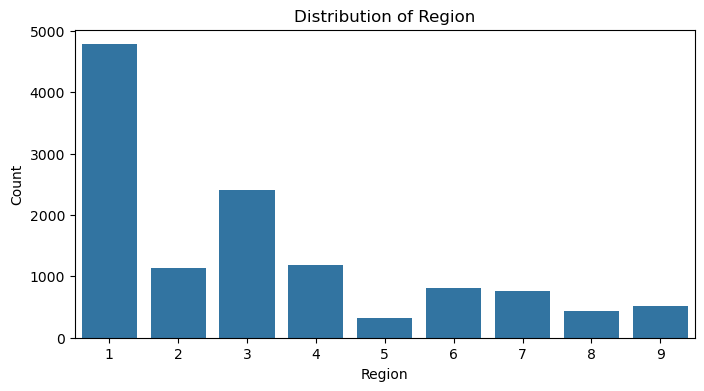

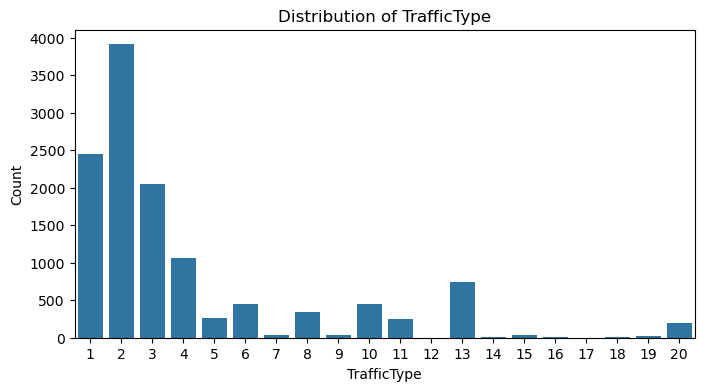

In [15]:
# Plot distributions for remaining int64 columns
for col in remaining_int64_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=shoppers_data)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

### Distribution Plots for Numerical Variables

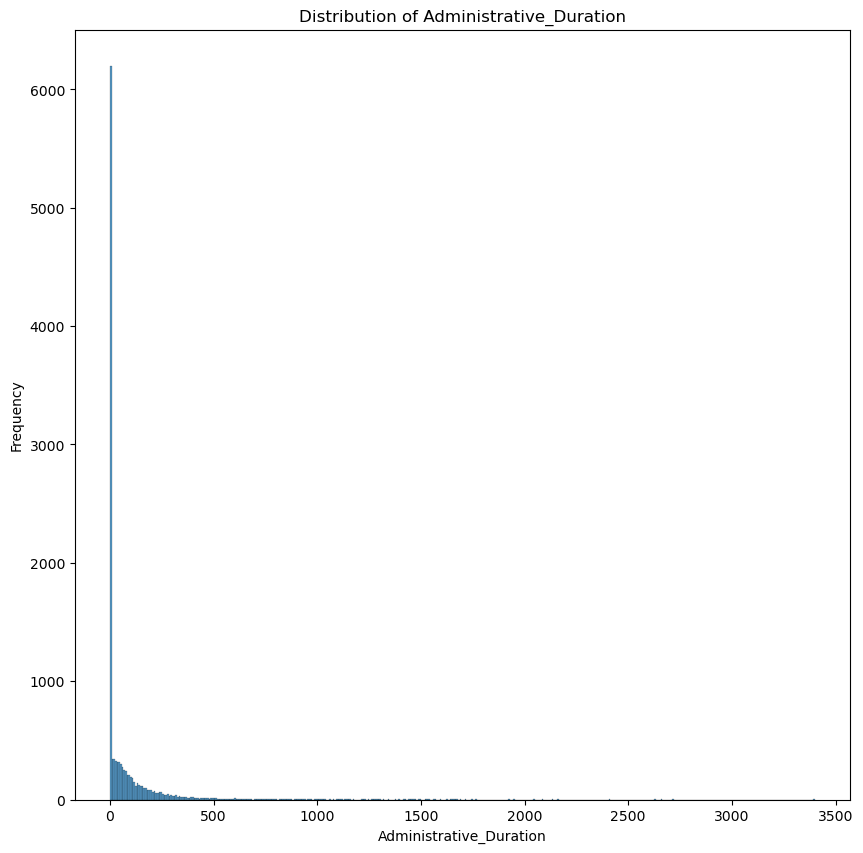

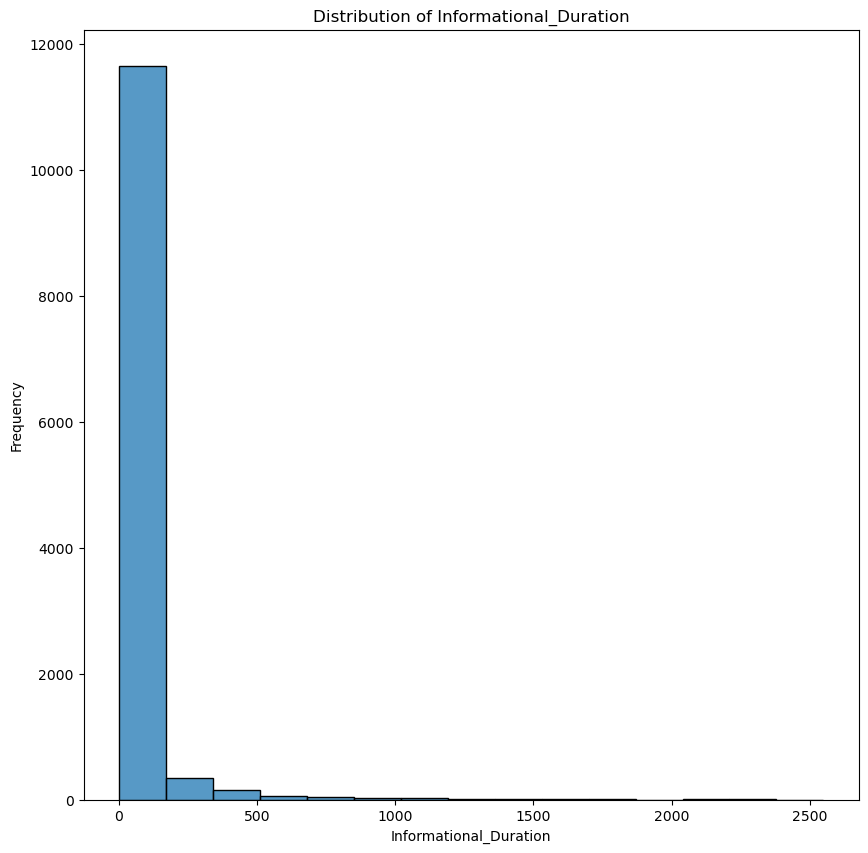

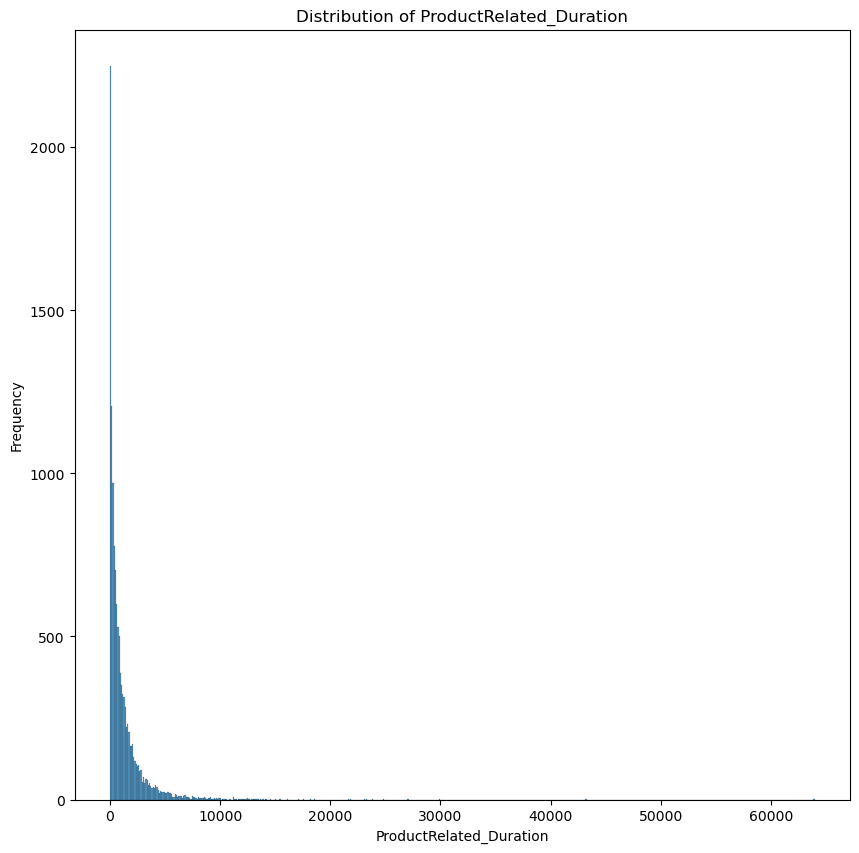

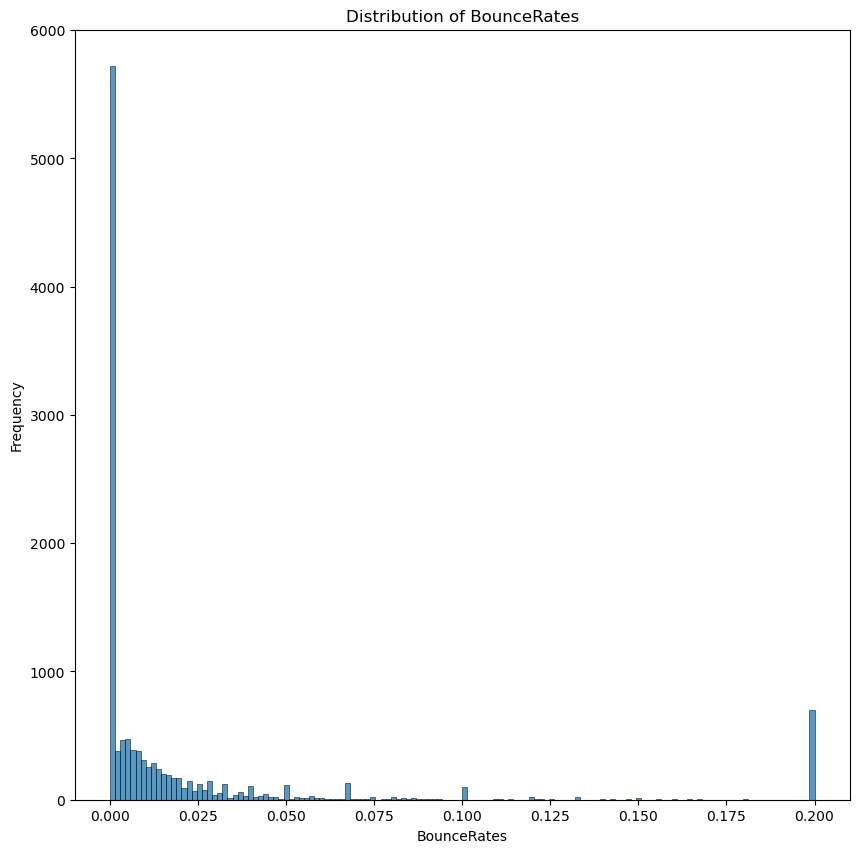

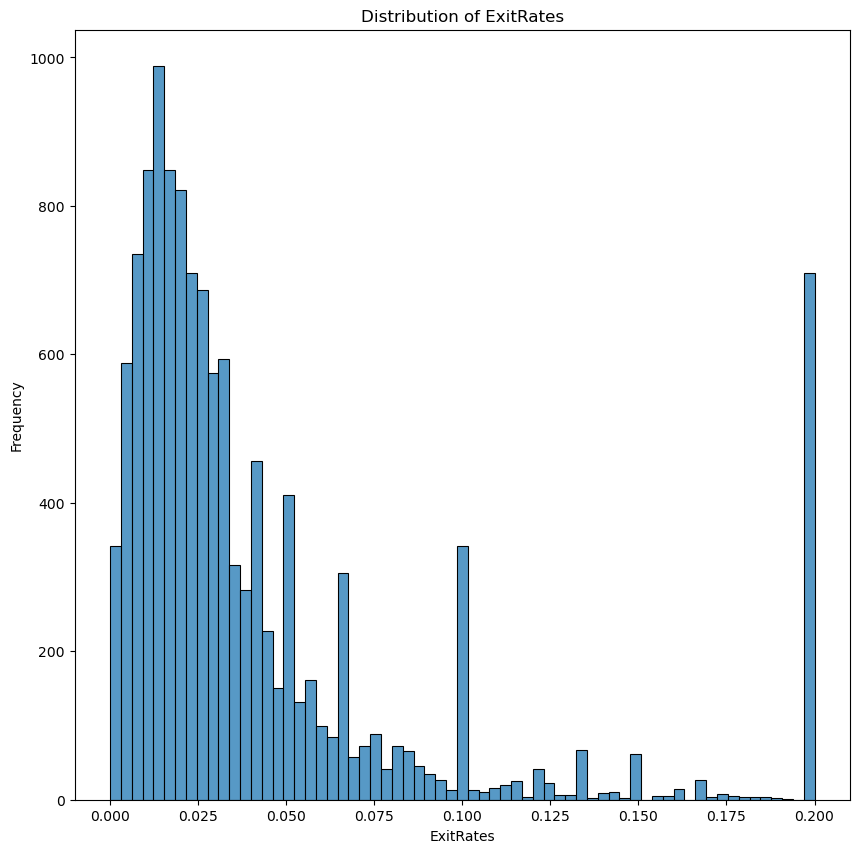

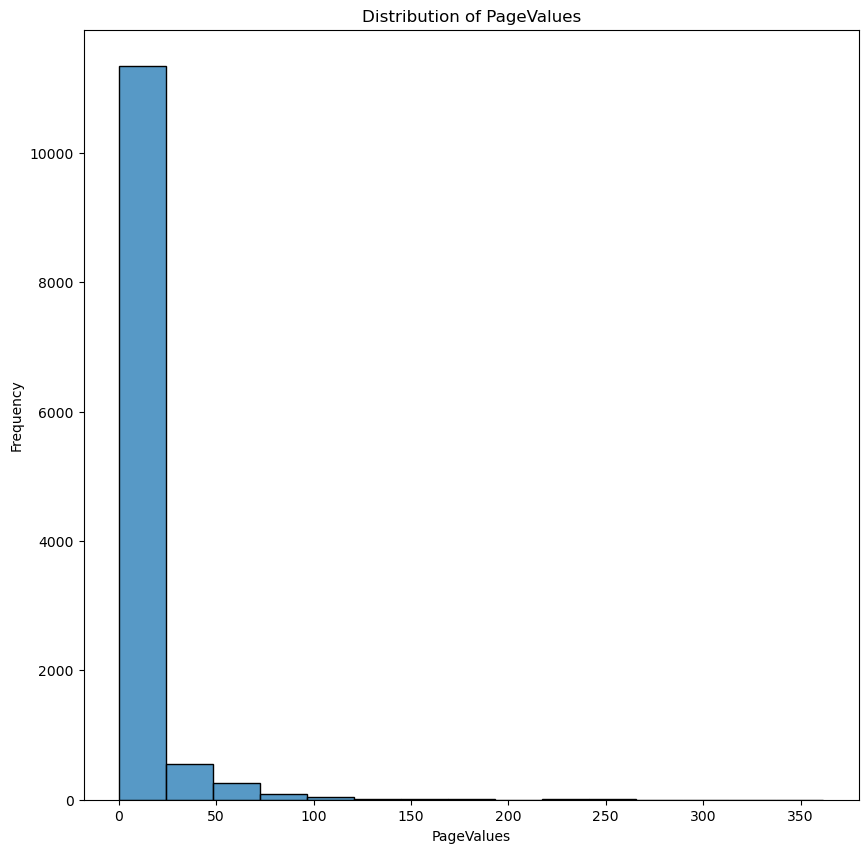

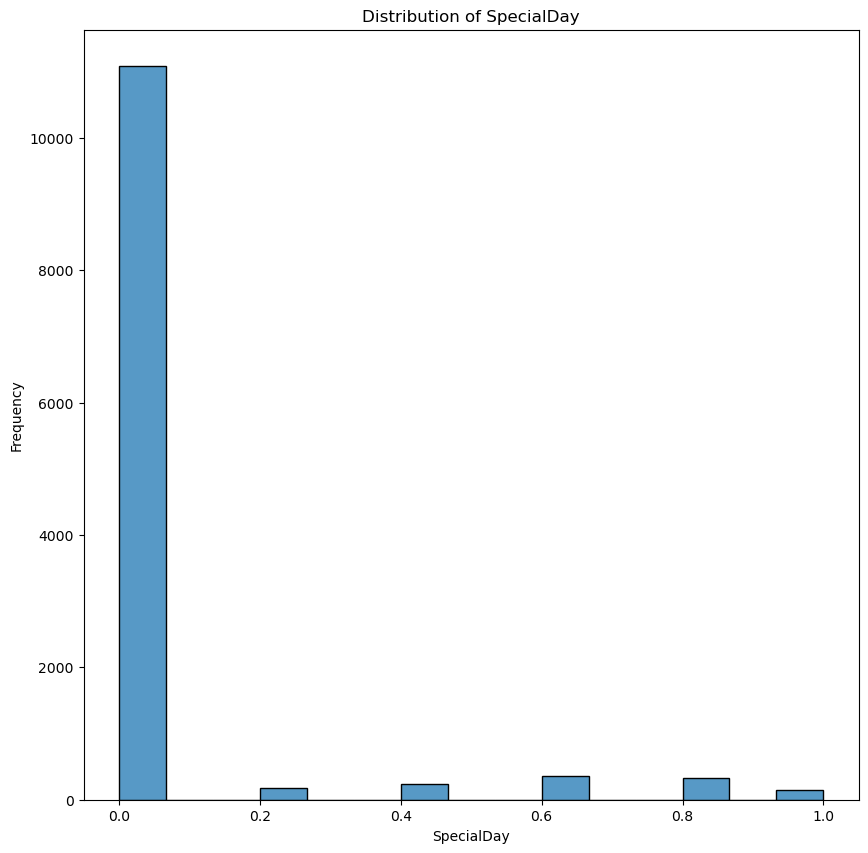

In [16]:
# Numerical features(Float64)
numerical_features = shoppers_data.select_dtypes(include=['float64']).columns

# Plot distributions for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 10))
    sns.histplot(shoppers_data[feature])
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

- From these distribution plots, you can see that the distribution for nearly all the numerical features is right-skewed and hence log transformation needs to be performed to ensure that the features follow a more normal distribution.
- Though, the ExitRates and BounceRates have several peaks in their distribution indicating a right-skewed, multi-modal distribution. So sqrt transformation needs to be performed on these columns to deal with the multi-modal nature.

## Feature Engineering(Perform Log and Square Root Transformation on Numerical Features)

In [17]:
# Identify other float64 columns excluding 'ExitRates' and 'BounceRates'
float64_cols = shoppers_data.select_dtypes(include=['float64']).columns
log_transform_cols = [col for col in float64_cols if col not in ['ExitRates', 'BounceRates']]

# Apply log transformation on the remaining float64 columns
for col in log_transform_cols:
    shoppers_data[f'Log_{col}'] = np.log(shoppers_data[col] + 1)

# Perform square root transformation on 'ExitRates' and 'BounceRates'
shoppers_data['Sqrt_ExitRates'] = np.sqrt(shoppers_data['ExitRates'])
shoppers_data['Sqrt_BounceRates'] = np.sqrt(shoppers_data['BounceRates'])

# Remove the float64 columns without the transformations
shoppers_data.drop(columns=float64_cols, axis=1, inplace=True)

shoppers_data.head(100)

,Administrative,Informational,ProductRelated,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Log_Administrative_Duration,Log_Informational_Duration,Log_ProductRelated_Duration,Log_PageValues,Log_SpecialDay,Sqrt_ExitRates,Sqrt_BounceRates
0,0,0,1,Feb,1,1,1,1,Returning_Visitor,False,False,0.0,0.0,0.000000,0.0,0.000000,0.447214,0.447214
1,0,0,2,Feb,2,2,1,2,Returning_Visitor,False,False,0.0,0.0,4.174387,0.0,0.000000,0.316228,0.000000
2,0,0,1,Feb,4,1,9,3,Returning_Visitor,False,False,0.0,0.0,0.000000,0.0,0.000000,0.447214,0.447214
3,0,0,2,Feb,3,2,2,4,Returning_Visitor,False,False,0.0,0.0,1.299283,0.0,0.000000,0.374166,0.223607
4,0,0,10,Feb,3,3,1,4,Returning_Visitor,True,False,0.0,0.0,6.443336,0.0,0.000000,0.223607,0.141421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,2,Feb,1,1,1,3,Returning_Visitor,False,False,0.0,0.0,3.526361,0.0,0.182322,0.316228,0.000000
96,0,0,6,Feb,1,1,1,3,Returning_Visitor,False,False,0.0,0.0,7.357237,0.0,0.182322,0.258199,0.223607
97,0,0,4,Feb,1,1,1,4,Returning_Visitor,False,False,0.0,0.0,4.663439,0.0,0.470004,0.158114,0.000000
98,0,1,7,Feb,2,4,1,7,Returning_Visitor,False,False,0.0,0.0,3.931826,0.0,0.470004,0.284521,0.195180


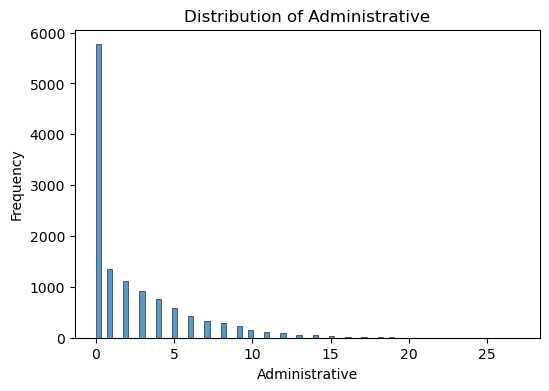

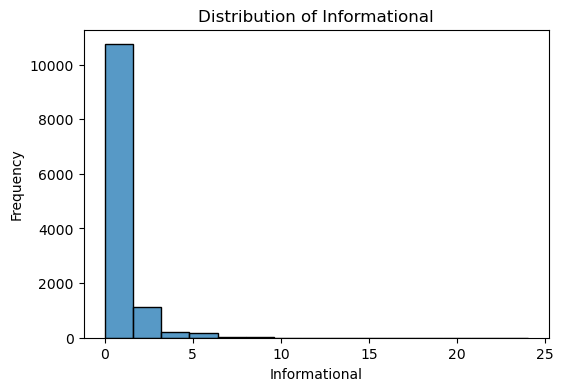

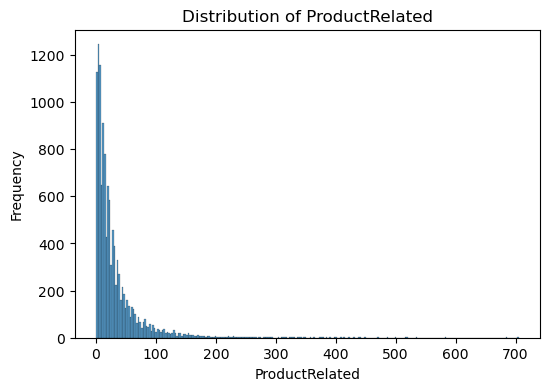

In [18]:
# Plot distributions for int64 columns that are numerical
for feature in specific_int64_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(shoppers_data[feature])
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

- These plots also have a right-skewed distribution, so apply log transformations on these features as well.

## Feature Engineering(Apply Log Transformation on the Int64 features)

In [19]:
# Apply log transformation on specific int64 columns
for col in specific_int64_cols:
    shoppers_data[f'Log_{col}'] = np.log(shoppers_data[col] + 1)

# Remove the float64 columns without the transformations
shoppers_data.drop(columns=specific_int64_cols, axis=1, inplace=True)

shoppers_data.head()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Log_Administrative_Duration,Log_Informational_Duration,Log_ProductRelated_Duration,Log_PageValues,Log_SpecialDay,Sqrt_ExitRates,Sqrt_BounceRates,Log_Administrative,Log_Informational,Log_ProductRelated
0,Feb,1,1,1,1,Returning_Visitor,False,False,0.0,0.0,0.000000,0.0,0.0,0.447214,0.447214,0.0,0.0,0.693147
1,Feb,2,2,1,2,Returning_Visitor,False,False,0.0,0.0,4.174387,0.0,0.0,0.316228,0.000000,0.0,0.0,1.098612
2,Feb,4,1,9,3,Returning_Visitor,False,False,0.0,0.0,0.000000,0.0,0.0,0.447214,0.447214,0.0,0.0,0.693147
3,Feb,3,2,2,4,Returning_Visitor,False,False,0.0,0.0,1.299283,0.0,0.0,0.374166,0.223607,0.0,0.0,1.098612
4,Feb,3,3,1,4,Returning_Visitor,True,False,0.0,0.0,6.443336,0.0,0.0,0.223607,0.141421,0.0,0.0,2.397895


In [20]:
# Custom function to detect outliers for specific feature
def outlierDetection(data, feature):
    # Calculate IQR for outlier detection
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = max(Q1 - 1.5 * IQR, 0)
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    
    # Print out the results
    print(f"Feature: {feature}")
    print(f"Lower bound for outliers: {lower_bound}")
    print(f"Upper bound for outliers: {upper_bound}")
    print(f"Number of outliers detected: {outliers.shape[0]}")
    print()

In [21]:
# Columns to check for outliers (float64 columns)
float64_cols = shoppers_data.select_dtypes(include=['float64']).columns
selected_columns = list(float64_cols)

# Run outlier detection on each selected column
for col in selected_columns:
    outlierDetection(shoppers_data, col)

Feature: Log_Administrative_Duration
Lower bound for outliers: 0
Upper bound for outliers: 11.365042034398932
Number of outliers detected: 0

Feature: Log_Informational_Duration
Lower bound for outliers: 0.0
Upper bound for outliers: 0.0
Number of outliers detected: 2405

Feature: Log_ProductRelated_Duration
Lower bound for outliers: 2.1181700867058937
Upper bound for outliers: 10.392646470766545
Number of outliers detected: 810

Feature: Log_PageValues
Lower bound for outliers: 0.0
Upper bound for outliers: 0.0
Number of outliers detected: 2730

Feature: Log_SpecialDay
Lower bound for outliers: 0.0
Upper bound for outliers: 0.0
Number of outliers detected: 1251

Feature: Sqrt_ExitRates
Lower bound for outliers: 0
Upper bound for outliers: 0.3797327047676313
Number of outliers detected: 856

Feature: Sqrt_BounceRates
Lower bound for outliers: 0
Upper bound for outliers: 0.32415805502024364
Number of outliers detected: 814

Feature: Log_Administrative
Lower bound for outliers: 0
Upper b

## Feature Engineering(Label Encode Boolean and String Features For Correlation Matrix)

In [22]:
# Copy the dataset to avoid modifying the original data
shoppers_data_encoded = shoppers_data.copy()

# Apply label encoding to bool and object columns
label_cols = shoppers_data_encoded.select_dtypes(include=['bool', 'object']).columns
label_encoder = LabelEncoder()

for col in label_cols:
    shoppers_data_encoded[col] = label_encoder.fit_transform(shoppers_data_encoded[col])

## Bivariate Analysis

## Correlation Heatmap of All Features

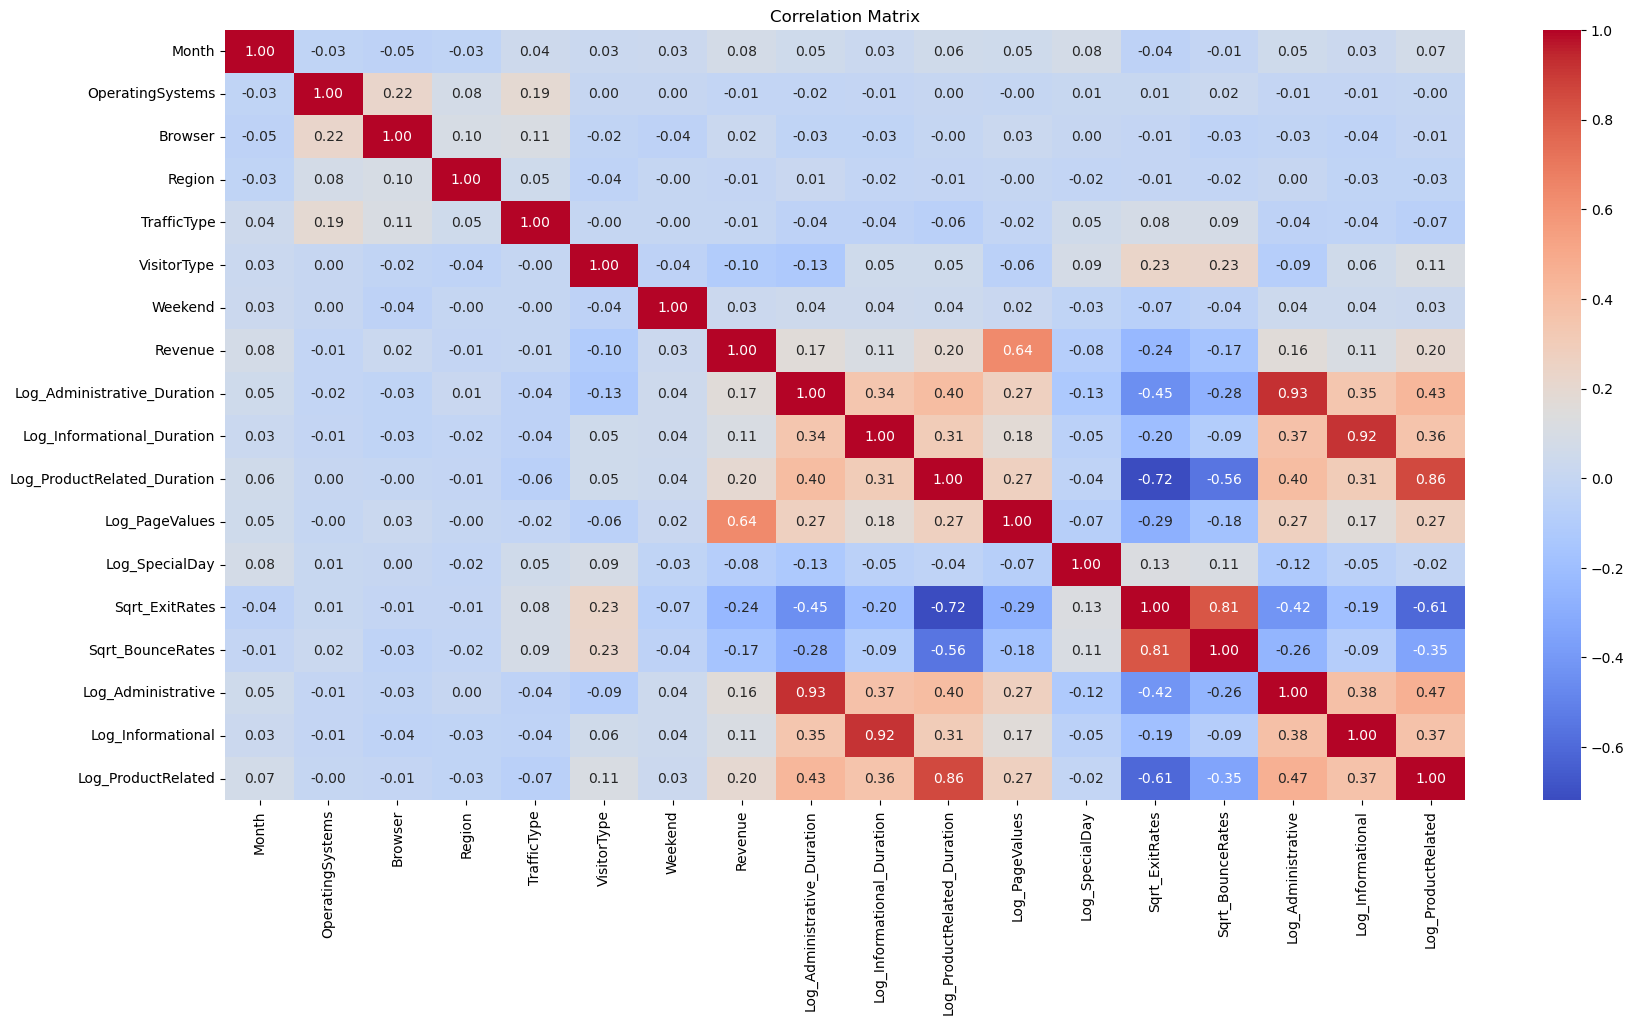

In [23]:
plt.figure(figsize=(20, 10))
sns.heatmap(shoppers_data_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

- From the correlation matrix there are several pairs of features(i.e Log_Administrative_Duration and Log_Administrative, Log_Informational and Log_Informational_Duration, Log_ProductRelated and Log_ProductRelated_Duration, Sqrt_BounceRates and Sqrt_ExitRates) with very high correlation with each other.
   - From here, we can remove one from each pair to reduce multicollinearity of these features(i.e. Log_Administrative, Log_Informational, Log_ProductRelated, Sqrt_BounceRates)
- Furthermore, there are features(i.e. OperatingSystems, Browser, Region, and TrafficType) with extremely low correlation with the target variable Revenue hence these can be removed from dataset to reduce dimensionality of problem.

## Feature Engineering(Remove Redundant Features)

In [24]:
# Remove redundant features
sshoppers_data_encoded = shoppers_data_encoded.drop(['Log_Administrative', 'Log_Informational', 'Log_ProductRelated', 'Sqrt_BounceRates', 'OperatingSystems', 'Browser', 'Region', 'TrafficType'], axis=1)
shoppers_data_encoded.head()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Log_Administrative_Duration,Log_Informational_Duration,Log_ProductRelated_Duration,Log_PageValues,Log_SpecialDay,Sqrt_ExitRates,Sqrt_BounceRates,Log_Administrative,Log_Informational,Log_ProductRelated
0,2,1,1,1,1,2,0,0,0.0,0.0,0.000000,0.0,0.0,0.447214,0.447214,0.0,0.0,0.693147
1,2,2,2,1,2,2,0,0,0.0,0.0,4.174387,0.0,0.0,0.316228,0.000000,0.0,0.0,1.098612
2,2,4,1,9,3,2,0,0,0.0,0.0,0.000000,0.0,0.0,0.447214,0.447214,0.0,0.0,0.693147
3,2,3,2,2,4,2,0,0,0.0,0.0,1.299283,0.0,0.0,0.374166,0.223607,0.0,0.0,1.098612
4,2,3,3,1,4,2,1,0,0.0,0.0,6.443336,0.0,0.0,0.223607,0.141421,0.0,0.0,2.397895


## Feature Engineering(One Hot Encode Features)

In [25]:
# One-hot encode selected categorical columns
shoppers_data_one_encoded = pd.get_dummies(shoppers_data_encoded, columns=['Month', 'VisitorType'], drop_first=True)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Identify the one-hot encoded columns (they will contain '_' in their names)
one_hot_cols = [col for col in shoppers_data_one_encoded.columns if '_' in col and 'Log' not in col and 'Sqrt' not in col]

# Convert only the one-hot encoded and boolean columns to integers
shoppers_data_one_encoded[one_hot_cols] = shoppers_data_one_encoded[one_hot_cols].astype(int)
shoppers_data_one_encoded.head()

,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Log_Administrative_Duration,Log_Informational_Duration,Log_ProductRelated_Duration,Log_PageValues,Log_SpecialDay,Sqrt_ExitRates,Sqrt_BounceRates,Log_Administrative,Log_Informational,Log_ProductRelated,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,VisitorType_1,VisitorType_2
0,1,1,1,1,0,0,0.0,0.0,0.000000,0.0,0.0,0.447214,0.447214,0.0,0.0,0.693147,0,1,0,0,0,0,0,0,0,0,1
1,2,2,1,2,0,0,0.0,0.0,4.174387,0.0,0.0,0.316228,0.000000,0.0,0.0,1.098612,0,1,0,0,0,0,0,0,0,0,1
2,4,1,9,3,0,0,0.0,0.0,0.000000,0.0,0.0,0.447214,0.447214,0.0,0.0,0.693147,0,1,0,0,0,0,0,0,0,0,1
3,3,2,2,4,0,0,0.0,0.0,1.299283,0.0,0.0,0.374166,0.223607,0.0,0.0,1.098612,0,1,0,0,0,0,0,0,0,0,1
4,3,3,1,4,1,0,0.0,0.0,6.443336,0.0,0.0,0.223607,0.141421,0.0,0.0,2.397895,0,1,0,0,0,0,0,0,0,0,1


## Feature Engineering(Normalize Features)

In [26]:
# Use MinMaxScaler to normalize data
scaler = MinMaxScaler()

# Identify columns to normalize (all remaining numerical columns)
columns_to_normalize = shoppers_data_one_encoded.select_dtypes(include=['float64']).columns

# Apply MinMax scaling and convert the result to a DataFrame
shoppers_data_one_encoded[columns_to_normalize] = pd.DataFrame(scaler.fit_transform(shoppers_data_one_encoded[columns_to_normalize]), columns=columns_to_normalize)

shoppers_data_one_encoded.head(100)

,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Log_Administrative_Duration,Log_Informational_Duration,Log_ProductRelated_Duration,Log_PageValues,Log_SpecialDay,Sqrt_ExitRates,Sqrt_BounceRates,Log_Administrative,Log_Informational,Log_ProductRelated,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,VisitorType_1,VisitorType_2
0,1,1,1,1,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.105669,0,1,0,0,0,0,0,0,0,0,1
1,2,2,1,2,0,0,0.000000,0.000000,0.377218,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.167481,0,1,0,0,0,0,0,0,0,0,1
2,4,1,9,3,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.105669,0,1,0,0,0,0,0,0,0,0,1
3,3,2,2,4,0,0,0.000000,0.000000,0.117410,0.000000,0.000000,0.836660,0.500000,0.000000,0.000000,0.167481,0,1,0,0,0,0,0,0,0,0,1
4,3,3,1,4,1,0,0.000000,0.000000,0.582252,0.000000,0.000000,0.500000,0.316228,0.000000,0.000000,0.365554,0,1,0,0,0,0,0,0,0,0,1
5,2,2,1,3,0,0,0.000000,0.000000,0.455875,0.000000,0.000000,0.350438,0.280976,0.000000,0.000000,0.456693,0,1,0,0,0,0,0,0,0,0,1
6,2,4,3,3,0,0,0.000000,0.000000,0.000000,0.000000,0.485427,1.000000,1.000000,0.000000,0.000000,0.105669,0,1,0,0,0,0,0,0,0,0,1
7,1,2,1,5,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.208015,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,1
8,2,2,2,3,0,0,0.000000,0.000000,0.328710,0.000000,0.847997,0.707107,0.000000,0.000000,0.000000,0.167481,0,1,0,0,0,0,0,0,0,0,1
9,2,4,1,2,0,0,0.000000,0.000000,0.596887,0.000000,0.485427,0.333333,0.000000,0.000000,0.000000,0.211338,0,1,0,0,0,0,0,0,0,0,1


## Segregating variables: Independent and Dependent Variables

In [27]:
X = shoppers_data_one_encoded.drop(['Revenue'], axis=1)
y = shoppers_data_one_encoded['Revenue']
X.shape, y.shape

((12330, 26), (12330,))

## Split Data Into Train and Test Sets

In [28]:
# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25, stratify=y)

## Build Initial SVM Classifier Model

In [29]:
# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', random_state=25)
svm_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = svm_model.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)
print("Training F1 Score:", train_f1)

# Predict on the test set
y_test_pred = svm_model.predict(X_test)
test_f1 = f1_score(y_test, y_test_pred)
print("Test F1 Score:", test_f1)

Training F1 Score: 0.6100443131462334
Test F1 Score: 0.5701357466063348


## Hypertune Parameters to Get Best SVM Classifier Model

In [30]:
# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Initialize GridSearchCV with F1 as the scoring metric
grid_search = GridSearchCV(SVC(random_state=25), param_grid, scoring='f1', refit=True, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

y_pred_train_tuned = best_svm_model.predict(X_train)

train_tuned_f1 = f1_score(y_train, y_pred_train_tuned)
print("Tuned Train F1 Score:", train_tuned_f1)

# Predict on the test set with the best model
y_pred_tuned = best_svm_model.predict(X_test)

# Calculate the F1 score for the tuned model
tuned_f1 = f1_score(y_test, y_pred_tuned)
print("Tuned Test F1 Score:", tuned_f1)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Tuned Train F1 Score: 0.6608695652173913
Tuned Test F1 Score: 0.6521739130434783
